In [77]:
import pefile
from os import listdir
from os.path import isfile, isdir, join
import string
import numpy as np
import re
import math
import sys
from matplotlib.pyplot import hist
import matplotlib.pyplot as plt
from keras.models import load_model

In [117]:
#mypath = "./data/malware/Backdoor.Win32.Agent.afxs_ed7c.exe"
mypath = "./data/benignware/006c9ca8ffd971f898c70840a3e9f9a762412e90"
#mypath = sys.argv[1]

In [118]:
def strings(filename, min=5):
    with open(filename, errors="ignore") as f:  # Python 3.x
    # with open(filename, "rb") as f:           # Python 2.x
        result = ""
        for c in f.read():
            if c in string.printable:
                result += c
                continue
            if len(result) >= min:
                yield result
            result = ""
        if len(result) >= min:  # catch result at EOF
            yield result

# General
has_resources

symbols

size

exports

has_signature

has_debug

has_tls

vsize

imports

has_relocations

In [119]:

gg = 0
arr = []
for qq in range(1):
    dic = {}
    gg += 1
    if gg > 50:
        break
    try:
        fullpath = mypath
        #print(fullpath)
        pe = pefile.PE(fullpath)
        #d = [pefile.DIRECTORY_ENTRY["IMAGE_DIRECTORY_ENTRY_EXPORT"]]
        #pe.parse_data_directories(directories=d)
        dic = {}
        
        # number of imported and exported function

        try:
            count = 0
            for entry in pe.DIRECTORY_ENTRY_IMPORT:
                for imp in entry.imports:
                    #print('\t', hex(imp.address), imp.name)
                    count += 1
            dic['imports'] = count
        except:
            dic['imports'] = 0

        try:
            count = 0
            for entry in pe.DIRECTORY_ENTRY_EXPORT:
                for imp in entry.imports:
                    #print('\t', hex(imp.address), imp.name)
                    count += 1
            dic['exports'] = count
        except:
            dic['exports'] = 0

        # size and virtual size

        vsize = 0
        size = 0
        for section in pe.sections:
            #print(section.Name.decode('utf-8'))
            #print("\tVirtual Address: " + hex(section.VirtualAddress))
            #print("\tVirtual Size: ", (section.Misc_VirtualSize))
            #print("\tRaw Size: " + hex(section.SizeOfRawData))
            vsize += section.Misc_VirtualSize
            size += section.SizeOfRawData
        dic['vsize'] = vsize
        dic['size'] = size

        # Debug sections or not
        try:
            tmp = pe.DIRECTORY_ENTRY_DEBUG
            dic['has_debug'] = 1
        except:
            dic['has_debug'] = 0

        # signature
        try:
            tmp = pe.VS_FIXEDFILEINFO[0].Signature
            dic['has_signature'] = 1
        except:
            dic['has_signature'] = 0

        # Resource

        try:
            tmp = pe.DIRECTORY_ENTRY_RESOURCE
            dic['has_resources'] = 1
        except:
            dic['has_resources'] = 0

        # TLS

        try:
            tmp = pe.DIRECTORY_ENTRY_TLS
            dic['has_tls'] = 1
        except:
            dic['has_tls'] = 0
            
        # relocations
        
        try:
            tmp = pe.DIRECTORY_ENTRY_BASERELOC
            dic['has_relocations'] = 1
        except:
            dic['has_relocations'] = 0

        # number of symbol QQ
        
        dic['symbols'] = 0
        
        arr.append(dic)
        
    except:
        continue
general = arr[0]

# Strings

In [120]:
#mypath = "./data/malware/Backdoor.Win32.Agent.afxs_ed7c.exe"

# 取得所有檔案與子目錄名稱
#files = listdir(mypath)

npsl = []
for qq in range(1):
    fullpath = mypath
    sl = list(strings(fullpath))
    npsl.append(sl)
# MZ
num = 0
MZ = 0
for obj in npsl[num]:
    if 'MZ' in obj:
        MZ += 1
        #print(obj)
print(MZ)

# avglength

tl = 0
for obj in npsl[num]:
    tl += len(obj)
avlength = tl/len(npsl[num])
print(avlength)

#numstrings

numstrings = len(npsl[num])
print(numstrings)

# urls

urls = 0
for obj in npsl[num]:
    if 'https://' in obj or 'http://' in obj:
        urls += 1
print(urls)

# paths

paths = 0
for obj in npsl[num]:
    if 'C:\\' == obj[0:3] or 'D:\\' == obj[0:3]:
        paths += 1
print(paths)

# printables

printables = 0
for obj in npsl[num]:
    n = len(obj)
    for i in range(n-5):
        if obj[i:(i+5)].isprintable():
            printables += 1
            break
print(printables)


# entropy

a = ''.join(npsl[num])


def entropys(string):
        "Calculates the Shannon entropy of a string"

        # get probability of chars in string
        prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list(string)) ]

        # calculate the entropy
        entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob ])

        return entropy
entropy = entropys(npsl[num])

# printabledist

printablehist = []
for obj in npsl[num]:
    n = len(obj)
    for i in range(n-5):
        if obj[i:(i+5)].isprintable():
            printablehist.append((obj))
            break
printabledist = hist(printablehist,96)[0]

# registry

registry = 0
for obj in npsl[num]:
    if 'HKEY_ ' in obj:
        registry += 1
        print(obj)
print(registry)

# make dictionary
strs = {}

title = ['MZ',
'avlength',
'entropy',
'numstrings',
'paths',
'printabledist',
'printables',
'registry',
'urls']

strs['MZ'] = MZ
strs['avlength'] = avlength
strs['entropy'] = entropy
strs['numstrings'] = numstrings
strs['paths'] = paths
strs['printabledist'] = (printabledist)
strs['printables'] = printables
strs['registry'] = registry
strs['urls'] = urls

1
18.132902500702446
3559
0
0
2787
0
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f6835484620> (for post_execute):


ValueError: 
EuEuED$D$
      ^
Expected end of text (at char 6), (line:1, col:7)

ValueError: 
EuEuED$D$
      ^
Expected end of text (at char 6), (line:1, col:7)

<Figure size 432x288 with 1 Axes>

# Histogram

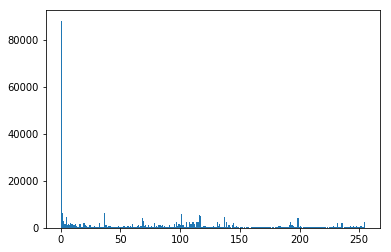

In [121]:
content = bytearray(open(mypath, 'rb').read())

freq, bins, patches = plt.hist(content, 256)

histogram = freq

# Combine

In [122]:
print(general)
print(strs)
print(histogram)
print(general.keys())

{'has_relocations': 1, 'has_tls': 1, 'has_debug': 0, 'imports': 132, 'has_resources': 0, 'exports': 0, 'has_signature': 0, 'symbols': 0, 'size': 291328, 'vsize': 293528}
{'urls': 0, 'printables': 2787, 'registry': 0, 'numstrings': 3559, 'entropy': 10.499903084848471, 'paths': 0, 'MZ': 1, 'printabledist': array([33., 39., 23., 19., 21., 19., 68., 20., 19., 20., 33., 34., 41.,
       27., 24., 43., 28., 20., 33., 31., 26., 32., 18., 19., 36., 27.,
       37., 19., 18., 19., 19., 19., 19., 18., 19., 19., 19., 19., 19.,
       18., 23., 57., 57., 57., 57., 54., 57., 57., 57., 57., 54., 57.,
       57., 57., 57., 29., 29., 38., 38., 38., 38., 37., 36., 38., 33.,
       19., 19., 18., 19., 19., 19., 19., 19., 18., 19., 19., 19., 19.,
       19., 18., 19., 19., 19., 19., 18., 19., 19., 19., 19., 19., 18.,
       19., 19., 19., 19., 19.]), 'avlength': 18.132902500702446}
[88189.  6246.  2844.  1569.  4748.  1383.  1440.  1354.  2120.  1420.
  1059.  1259.  1544.   613.   429.  1548.  1435.   3

In [123]:
output = []
keys_strings = ['avlength', 'numstrings', 'registry', 'urls', 'MZ', 'printables', 'entropy', 'paths', 'printabledist']
keys_general = ['exports', 'has_resources', 'imports', 'symbols', 'has_signature', 'has_relocations', 'has_debug', 'vsize', 'size', 'has_tls']
for obj in range(1):
    feature_num = []
    for i in range(3):
        feature_num.append([])
    for j in keys_strings:
        if j != 'printabledist':
            feature_num[0].append(strs[j])
        else:
            for k in range(96):
                feature_num[0].append(strs[j][k])
    for i in range(256):
        feature_num[1].append(histogram[i])
    for i in keys_general:
        feature_num[2].append(general[i])
    for i in range(256 - 104):
        feature_num[0].append(0)
    for i in range(256 - 10):
        feature_num[2].append(0)
    output.append(feature_num)

In [124]:
output = np.array(output)

In [125]:
output.shape

(1, 3, 256)

In [126]:
output

array([[[1.81329025e+01, 3.55900000e+03, 0.00000000e+00, 0.00000000e+00,
         1.00000000e+00, 2.78700000e+03, 1.04999031e+01, 0.00000000e+00,
         3.30000000e+01, 3.90000000e+01, 2.30000000e+01, 1.90000000e+01,
         2.10000000e+01, 1.90000000e+01, 6.80000000e+01, 2.00000000e+01,
         1.90000000e+01, 2.00000000e+01, 3.30000000e+01, 3.40000000e+01,
         4.10000000e+01, 2.70000000e+01, 2.40000000e+01, 4.30000000e+01,
         2.80000000e+01, 2.00000000e+01, 3.30000000e+01, 3.10000000e+01,
         2.60000000e+01, 3.20000000e+01, 1.80000000e+01, 1.90000000e+01,
         3.60000000e+01, 2.70000000e+01, 3.70000000e+01, 1.90000000e+01,
         1.80000000e+01, 1.90000000e+01, 1.90000000e+01, 1.90000000e+01,
         1.90000000e+01, 1.80000000e+01, 1.90000000e+01, 1.90000000e+01,
         1.90000000e+01, 1.90000000e+01, 1.90000000e+01, 1.80000000e+01,
         2.30000000e+01, 5.70000000e+01, 5.70000000e+01, 5.70000000e+01,
         5.70000000e+01, 5.40000000e+01, 5.70000000

In [127]:
#model = load_model("/home/imccpeanut/Ember_Test/My_Ember/CNN_No_Byteentropy.h5")

In [128]:
model.predict(output)

array([[0.30048743]], dtype=float32)